**College Program Predictive Model - Machine Learning Final Project**

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# **Dataset overview**

In [ ]:
#importing the dataset
df = pd.read_excel('https://raw.githubusercontent.com/notfolded/MachineLearning-DS/main/college_program.xlsx')
df_raw = pd.read_excel('https://raw.githubusercontent.com/notfolded/MachineLearning-DS/main/college_program-raw.xlsx')

In [ ]:
#raw dataset including international respondents
df_raw

,Timestamp,"CONSENT STATEMENT\n\nI hereby acknowledge that I have read and understood the Data Privacy Agreement. I give my consent to the organization to collect, record, organize, update, modify, retrieve, consult, use, consolidate, block, erase, or destroy my person",Student Name,Gender,Current Year Level,"Current College Program\nWhat college program are you currently enrolled in? (e.g., BS Nursing, BS Chemical Engineering, etc.)",University / College\nWhere are you currently studying?\n(Please provide the full name of your college or university.),Column1,Philippine Based,High School Type\nWhat type of high school did you attend to?,...,How prepared did you feel going into college?,"Perceived Strength in Science, Technology, Engineering, and Mathematics subjects\nHow would you rate your strength in the subjects related above?","Perceived Strength with Accounting, Business, and Management subjects\nHow would you rate your strength in the subjects related above?",Perceived Strength with Technical-Vocational-Livelihood subjects\nHow would you rate your strength in the subjects related above?,Perceived Strength in Humanities and Communications subjects\nHow would you rate your strength in the subjects related above?,How passionate were you about pursuing your college program?,Which career paths or industries are you most interested in? \nSelect all that apply.,Which subjects did you enjoy the most in high school? \nSelect all that apply.,What hobbies/extracurricular activities did you enjoy in high school?\nSelect all that apply.,Email Address
0,2024-11-28 20:35:37.467,Yes,Cristel Kaye Billones,Female,4th Year,BS Applied Mathematics - Data Science Track,Far Eastern University - Manila,NaN,Yes,Private,...,5,5,5,2,2,5,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,"Sports, Music and Dancing, Arts and Crafts, Dr...",NaN
1,2024-11-28 21:02:13.579,Yes,NaN,Male,4th Year,BS Applied Mathematics - Data Science Track,Far Eastern University - Manila,NaN,Yes,Science High School,...,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec...",NaN
2,2024-11-28 21:12:15.508,Yes,NaN,Male,4th Year,BS Nutrition and Dietetics,Centro Escolar - Manila,NaN,Yes,Science High School,...,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism,NaN
3,2024-11-28 21:13:52.172,Yes,Ron Catuiran,Male,4th Year,BS Chemical Engineering,University of Santo Tomas,NaN,Yes,Science High School,...,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports,NaN
4,2024-11-28 21:16:47.005,Yes,NaN,Male,4th Year,BS Chemical Engineering,University of Santo Tomas,NaN,Yes,Technical,...,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2024-11-29 16:18:28.003,Yes,Pedro Firmo,Male,4th Year,Master's Degree in Architecture,Universidade do Minho,NaN,No,Public,...,4,2,3,3,4,4,"Arts and Humanities, Music Development","History, Technology, Arts","Music and Dancing, Arts and Crafts, Photograph...",NaN
207,2024-11-29 17:14:33.722,Yes,A,Prefer not to say,2nd year of five,Electrical Engineering,Modern university for technology and informati...,NaN,No,Private,...,1,3,2,2,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Technology","Sports, Music and Dancing, Arts and Crafts, Co...",NaN
208,2024-11-29 18:17:20.257,Yes,Aryan Bharati,Male,2nd Year,BE Electronics and Telecommunication,Vivekanand Education Society's Institute of Te...,NaN,No,Private,...,5,4,3,3,2,4,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History",Science Clubs,NaN
209,2024-11-29 19:31:51.288,Yes,Jasmine Yusifaniha Tarigan,Female,1st Year,Pure Mathematics,University of North 

*The dataset originates from a survey conducted for the College Program Predictive Model - Machine Learning Final Project. It includes information on consent, student demographics (e.g., year level, current college program, and university), high school background, perceived strengths in various academic areas, passion for their program, career interests, favorite subjects, and extracurricular activities. While the raw data contains responses from both Philippine-based and foreign students, only responses from Philippine-based students will be retained for analysis.*

# **Exploratory Data Analysis on Raw Data**


**Distribution of PH-based and Non-PH-based Answers**

,count
Philippine Based,
No,110
Yes,101


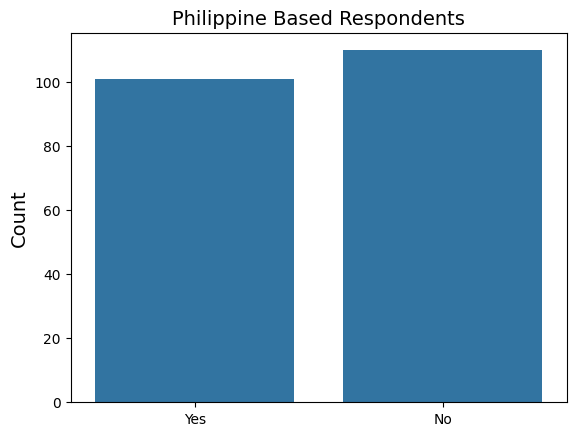

In [ ]:
#Checking for balance in data
sns.countplot(x = 'Philippine Based', data=df_raw)
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Philippine Based Respondents', fontsize=14)

df_raw['Philippine Based'].value_counts()


In [ ]:
#filtered data for PH-specific respondents
df.drop(columns="university", axis = 0, inplace = True)
df

,gender,yr_level,current_program,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,ave_household_income,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
0,Female,4th Year,BS Applied Mathematics - Data Science Track,Private,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,150000.0,...,3.0,5,5,5,2,2,5,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,"Sports, Music and Dancing, Arts and Crafts, Dr..."
1,Male,4th Year,BS Applied Mathematics - Data Science Track,Science High School,High School Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,12,Parents,50000.0,...,4.0,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4th Year,BS Nutrition and Dietetics,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,75000.0,...,0.5,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism
3,Male,4th Year,BS Chemical Engineering,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,40000.0,...,2.5,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports
4,Male,4th Year,BS Chemical Engineering,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,100000.0,...,1.5,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,2nd Year,BS Telecommunication Engineering,Public,High School Graduate,Hospitality and Service Industry,Yes,10,Parents,35000.0,...,2.0,3,4,1,5,1,4,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology, Physical Edu...","Sports, Music and Dancing, Science Clubs, Phot..."
96,Female,4th Year,BS Computer Engineering,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,35000.0,...,3.0,1,2,1,3,3,2,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,Debate and Public Speaking
97,Male,1st Year,BS Computer Science,Public,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,40000.0,...,2.0,4,5,4,5,4,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
98,Female,1st Year,BS Electrical engineering,Public,No formal education,Hospitality and Service Industry,No,50,Parents,17600.0,...,7.5,2,3,1,4,5,3,"STEM (Science, Technology, Engineering, Mathem...","History, Social Studies, Technology","Writing, Debate and Public Speaking"


**Attribute Distribution, Outliers, and Missing Values**

In [ ]:
# Basic dataset info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  100 non-null    object 
 1   yr_level                100 non-null    object 
 2   current_program         100 non-null    object 
 3   university              100 non-null    object 
 4   hs_type                 100 non-null    object 
 5   parents_educ            100 non-null    object 
 6   parents_fields          100 non-null    object 
 7   reloc                   100 non-null    object 
 8   travel_time_to_campus   100 non-null    int64  
 9   financial_source        100 non-null    object 
 10  ave_household_income    99 non-null     float64
 11  financial_preparedness  100 non-null    int64  
 12  family_influence        100 non-null    int64  
 13  hs_gpa                  100 non-null    float64
 14  ave_study_hours         100 non-null    flo

### Dataset Summary:

1. **Travel Time to Campus**: Highly variable, with a mean of 38 minutes and a maximum of 270 minutes, indicating potential outliers.

2. **Average Household Income**: Wide range (₱5,000 to ₱500,000), suggesting significant economic diversity among respondents.

3. **Financial Preparedness**: Respondents generally feel moderately prepared for college (mean = 3.38 on a scale of 1–5).

4. **High School GPA**: Scores are mostly high (mean = 91.27, max = 98.9), reflecting strong academic backgrounds.

5. **Average Study Hours**: Most respondents report moderate study time (mean = 3.3 hours/day), with a few reporting very high values (up to 15 hours).

6. **Perceived Strengths**: STEM is the highest-rated strength (mean = 3.92), while ABM (mean = 2.56) is the lowest-rated.

7. **Passion for College Program**: Respondents show a high level of passion (mean = 3.99, 75% at level 4 or above).

The data highlights notable variability in travel time, income, and study hours, warranting further investigation of outliers and patterns.

# **Data Cleaning**

In [ ]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
gender                    0
yr_level                  0
current_program           0
university                0
hs_type                   0
parents_educ              0
parents_fields            0
reloc                     0
travel_time_to_campus     0
financial_source          0
ave_household_income      1
financial_preparedness    0
family_influence          0
hs_gpa                    0
ave_study_hours           0
college_preparedness      0
pstrength_stem            0
pstrength_abm             0
pstrength_techvoc         0
pstrength_humss           0
passion                   0
careerpath_interest       0
hs_favesub                0
hs_extracurr              0
dtype: int64


In [ ]:
# Fill missing value (income) with median
df['ave_household_income'].fillna(df['ave_household_income'].median(), inplace=True)


<ipython-input-10-c6771a1a9290>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ave_household_income'].fillna(df['ave_household_income'].median(), inplace=True)


*Filling missing values in the `ave_household_income` column with the median is done to handle missing data effectively, as the median is robust to outliers and represents a central value without significantly skewing the dataset.*

In [ ]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
gender                    0
yr_level                  0
current_program           0
university                0
hs_type                   0
parents_educ              0
parents_fields            0
reloc                     0
travel_time_to_campus     0
financial_source          0
ave_household_income      0
financial_preparedness    0
family_influence          0
hs_gpa                    0
ave_study_hours           0
college_preparedness      0
pstrength_stem            0
pstrength_abm             0
pstrength_techvoc         0
pstrength_humss           0
passion                   0
careerpath_interest       0
hs_favesub                0
hs_extracurr              0
dtype: int64


In [ ]:
# Replace value 3.2 with 80 (equivalent grade)
df['hs_gpa'] = df['hs_gpa'].replace(3.2, 80)

In [ ]:
#Identifying extreme outliers
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Get the indexes and values of outliers for each column
for col in numeric_cols:
    outlier_indexes = df[outliers[col]].index.tolist()
    outlier_values = df.loc[outlier_indexes, col].tolist()

    print(f"\nOutliers in column '{col}':")
    for i, value in zip(outlier_indexes, outlier_values):
        print(f"Index: {i}, Value: {value}")


Outliers in column 'hs_gpa':
Index: 79, Value: 80.0
Index: 85, Value: 82.0
Index: 91, Value: 80.0
Index: 92, Value: 70.0
Index: 95, Value: 80.0
Index: 98, Value: 77.45

Outliers in column 'ave_study_hours':
Index: 8, Value: 8.0
Index: 17, Value: 8.0
Index: 32, Value: 7.5
Index: 64, Value: 10.0
Index: 76, Value: 8.0
Index: 80, Value: 8.0
Index: 91, Value: 15.0
Index: 98, Value: 7.5

Outliers in column 'ave_household_income':
Index: 0, Value: 150000.0
Index: 7, Value: 200000.0
Index: 16, Value: 200000.0
Index: 53, Value: 150000.0
Index: 61, Value: 500000.0
Index: 66, Value: 150000.0
Index: 73, Value: 250000.0


In [ ]:
#handling outliers
df.drop(index=[10, 61, 79, 91], inplace=True)

# Reset the index (optional, but recommended)
df.reset_index(drop=True, inplace=True)

df


,gender,yr_level,current_program,university,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
0,Female,4th Year,BS Applied Mathematics - Data Science Track,Far Eastern University - Manila,Private,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,...,3.0,5,5,5,2,2,5,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,"Sports, Music and Dancing, Arts and Crafts, Dr..."
1,Male,4th Year,BS Applied Mathematics - Data Science Track,Far Eastern University - Manila,Science High School,High School Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,12,Parents,...,4.0,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4th Year,BS Nutrition and Dietetics,Centro Escolar - Manila,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,...,0.5,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism
3,Male,4th Year,BS Chemical Engineering,University of Santo Tomas,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,...,2.5,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports
4,Male,4th Year,BS Chemical Engineering,University of Santo Tomas,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,...,1.5,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Male,2nd Year,BS Telecommunication Engineering,Siddaganga Institute of technology Tumkur Karn...,Public,High School Graduate,Hospitality and Service Industry,Yes,10,Parents,...,2.0,3,4,1,5,1,4,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology, Physical Edu...","Sports, Music and Dancing, Science Clubs, Phot..."
92,Female,4th Year,BS Computer Engineering,Edo State University Uzairue,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,...,3.0,1,2,1,3,3,2,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,Debate and Public Speaking
93,Male,1st Year,BS Computer Science,SRM institute of science and technology,Public,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,...,2.0,4,5,4,5,4,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
94,Female,1st Year,BS Electrical engineering,"AbdelMalek Saadi university, faculty of scienc...",Public,No formal education,Hospitality and Service Industry,No,50,Parents,...,7.5,2,3,1,4,5,3,"STEM (Science, Technology, Engineering, Mathem...","History, Social Studies, Technology","Writing, Debate and Public Speaking"


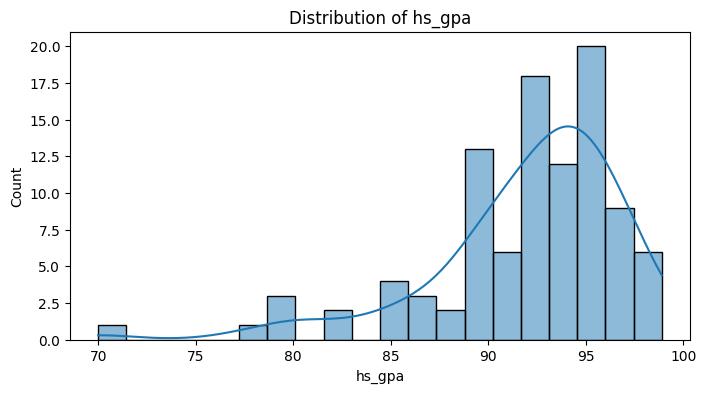

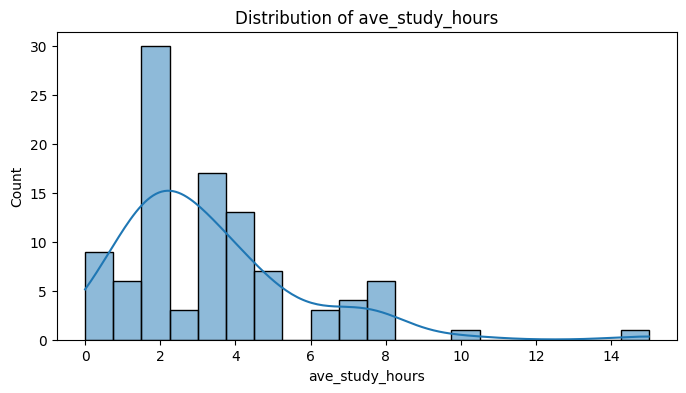

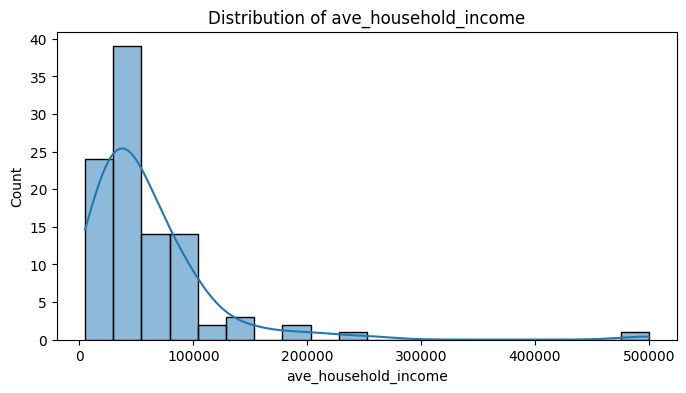

In [ ]:
# Distribution of numerical variables
numeric_cols = ['hs_gpa', 'ave_study_hours', 'ave_household_income']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


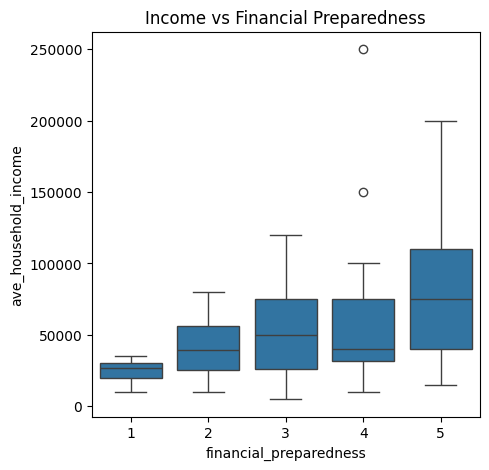

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='financial_preparedness', y='ave_household_income')
plt.title("Income vs Financial Preparedness")
plt.show()


*The boxplot shows the relationship between **financial preparedness** (1–5 scale) and **average household income**. As financial preparedness increases, median household income generally rises, indicating that higher income levels might contribute to better financial preparedness. However, there are notable outliers, especially in the higher preparedness levels, suggesting some students with exceptionally high incomes may feel similarly prepared as those with moderate incomes.*

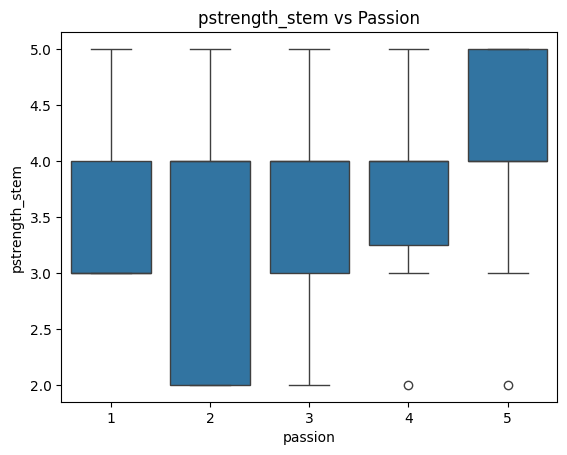

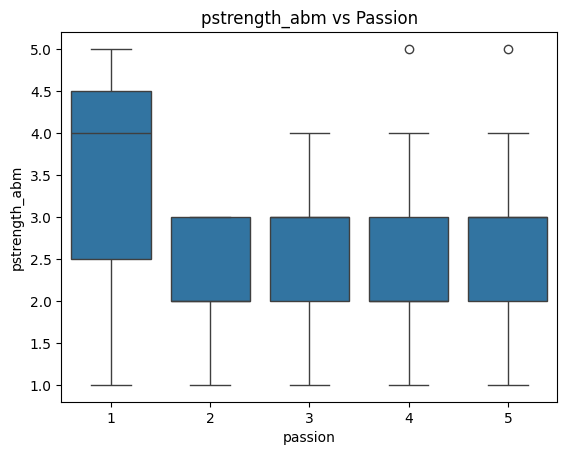

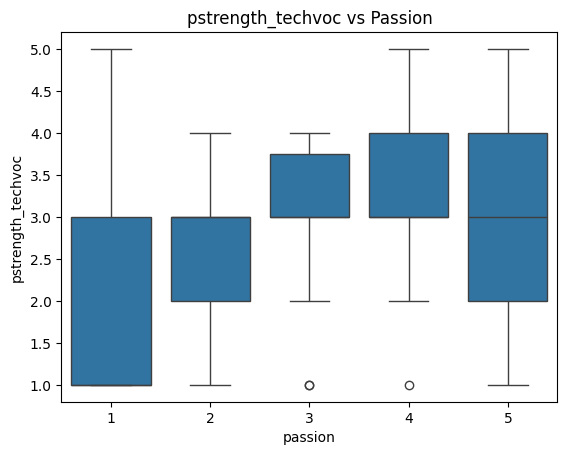

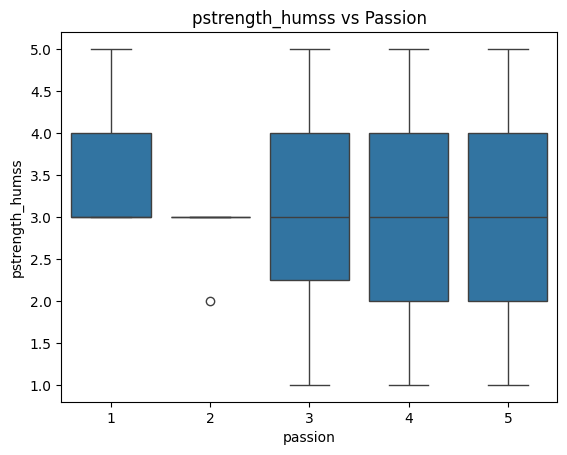

In [ ]:
academic_cols = ['pstrength_stem', 'pstrength_abm', 'pstrength_techvoc', 'pstrength_humss']
for col in academic_cols:
    sns.boxplot(data=df, x='passion', y=col)
    plt.title(f"{col} vs Passion")
    plt.show()


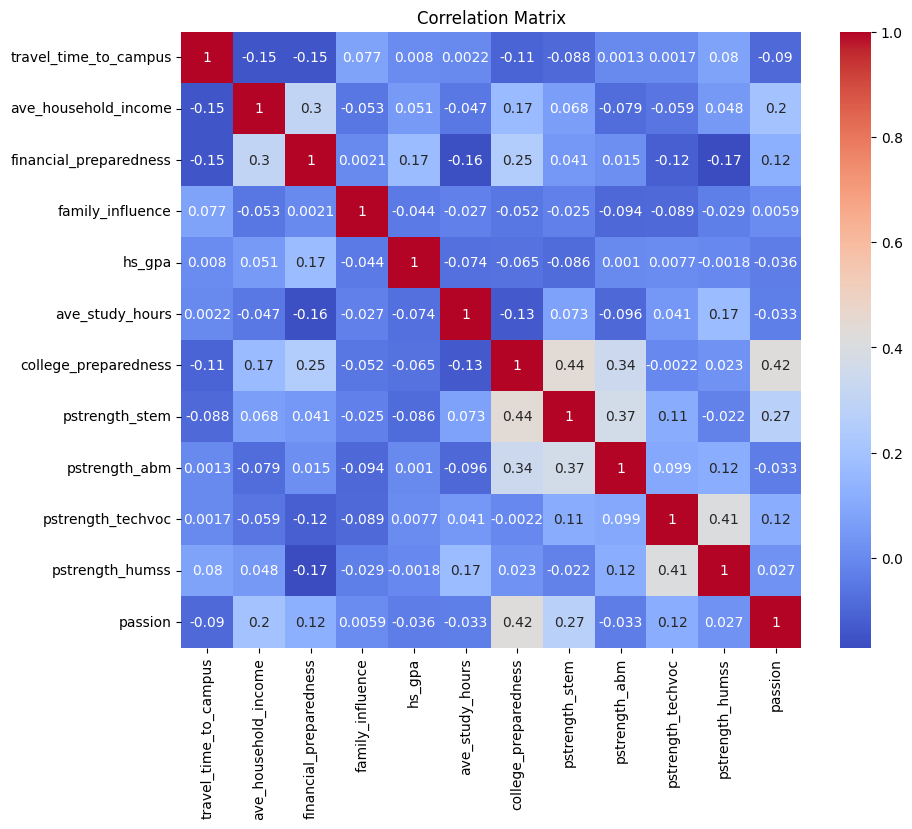

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


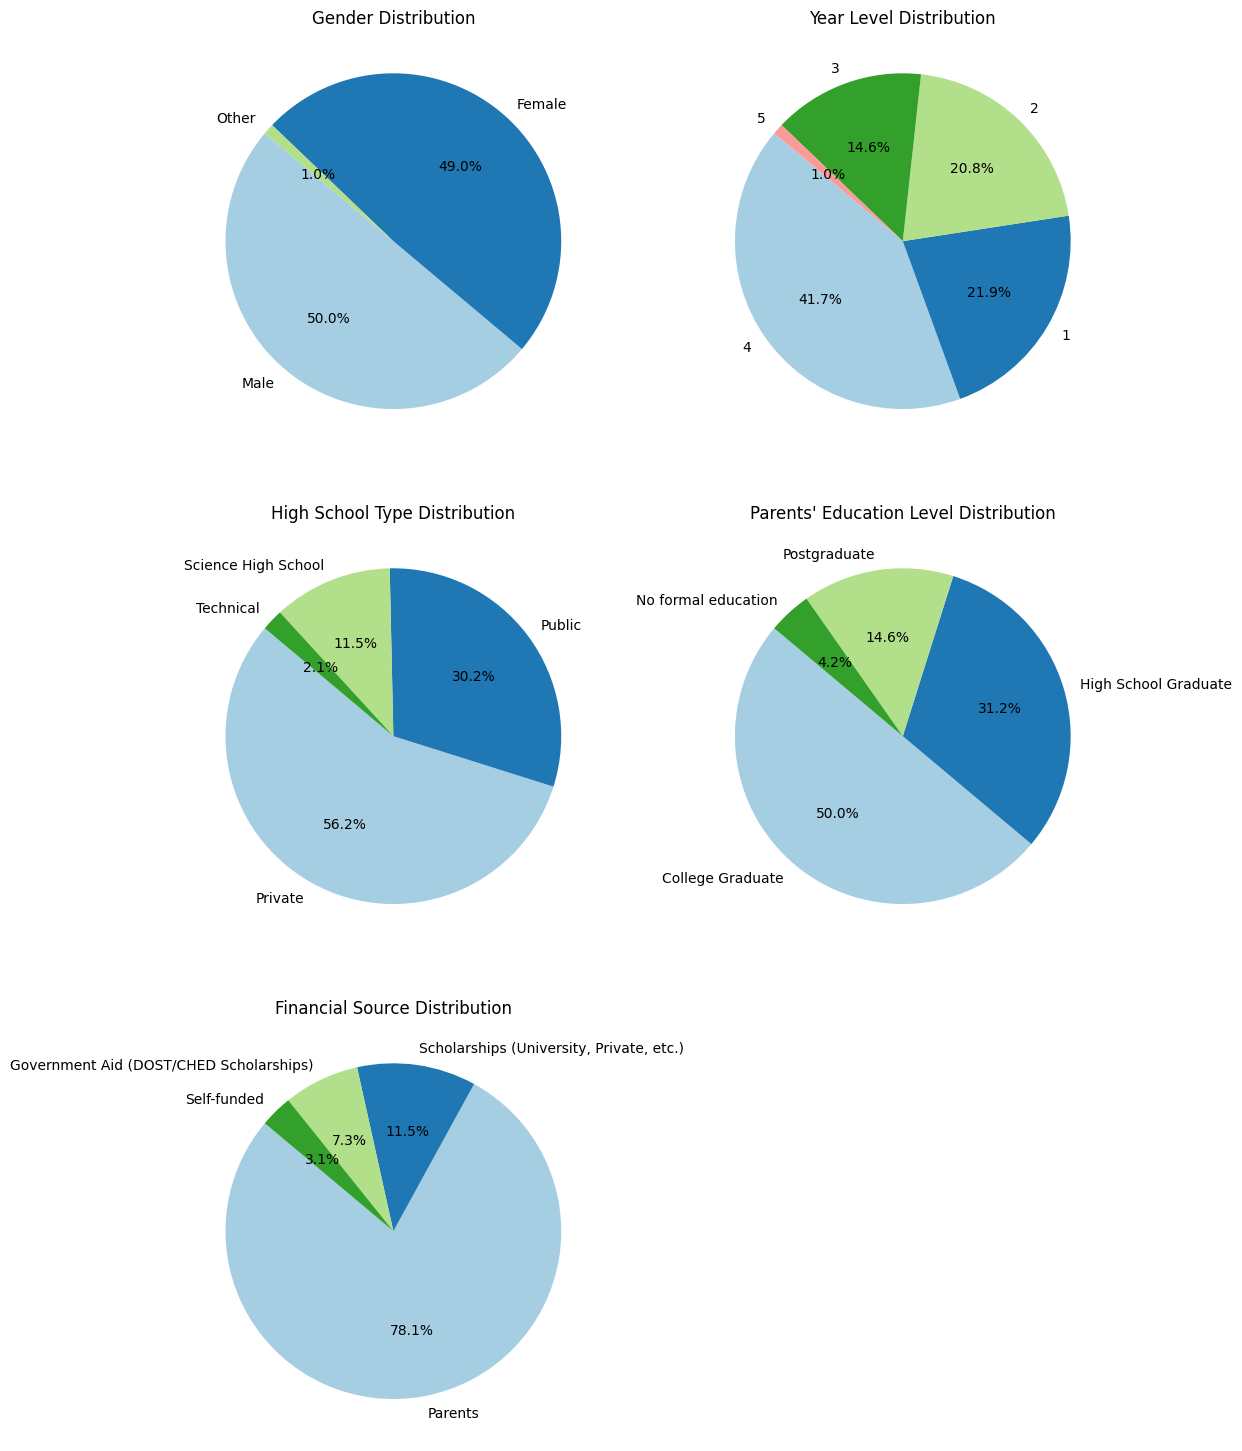

In [ ]:
# Define the columns for pie charts
columns_to_plot = {
    'gender': 'Gender Distribution',
    'yr_level': 'Year Level Distribution',
    'hs_type': 'High School Type Distribution',
    'parents_educ': 'Parents\' Education Level Distribution',
    'financial_source': 'Financial Source Distribution'
}

# Set up the figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Generate pie charts for each column
for i, (col, title) in enumerate(columns_to_plot.items()):
    data = df[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(title)

# Remove the last unused subplot (if columns < total subplots)
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Function to clean STEM formatting
def clean_stem_values(value):
    if isinstance(value, str):
        # Replace the full STEM description with 'STEM'
        value = value.replace('STEM (Science, Technology, Engineering, Mathematics)', 'STEM')
        # Split multiple values and clean each
        values = [v.strip().replace('STEM (Science, Technology, Engineering, Mathematics)', 'STEM') for v in value.split(',')]
        return ', '.join(set(values))
    return value

# Apply cleaning to specific columns
columns_to_clean = ['parents_fields', 'careerpath_interest']

for col in columns_to_clean:
    df[col] = df[col].apply(clean_stem_values)

df

,gender,yr_level,current_program,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,ave_household_income,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
0,Female,4,applied mathematics - data science,Private,College Graduate,"Health and Medicine, Business and Management, ...",Yes,15,Parents,150000.0,...,3.0,5,5,5,2,2,5,STEM,Mathematics,"Sports, Music and Dancing, Arts and Crafts, Dr..."
1,Male,4,applied mathematics - data science,Science High School,High School Graduate,STEM,Yes,12,Parents,50000.0,...,4.0,3,5,4,3,3,5,"Business and Management, STEM","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4,nutrition and dietetics,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,75000.0,...,0.5,3,3,2,3,2,3,"Health and Medicine, STEM, Law and Public Service","Science, Literature",Journalism
3,Male,4,chemical engineering,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,40000.0,...,2.5,3,3,3,3,4,5,"Business and Management, STEM, Education and A...","Science, History, Physical Education",Sports
4,Male,4,chemical engineering,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,100000.0,...,1.5,2,3,2,4,2,4,"Health and Medicine, Business and Management, ...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Male,2,telecommunication engineering,Public,High School Graduate,Hospitality and Service Industry,Yes,10,Parents,35000.0,...,2.0,3,4,1,5,1,4,"STEM, Want to explore VLSI industry","Mathematics, Science, Technology, Physical Edu...","Sports, Music and Dancing, Science Clubs, Phot..."
92,Female,4,computer engineering,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,35000.0,...,3.0,1,2,1,3,3,2,STEM,Mathematics,Debate and Public Speaking
93,Male,1,computer science,Public,College Graduate,"Health and Medicine, STEM",Yes,15,Parents,40000.0,...,2.0,4,5,4,5,4,5,"Business and Management, STEM, Education and A...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
94,Female,1,electrical engineering,Public,No formal education,Hospitality and Service Industry,No,50,Parents,17600.0,...,7.5,2,3,1,4,5,3,"STEM, Education and Academia","History, Social Studies, Technology","Writing, Debate and Public Speaking"


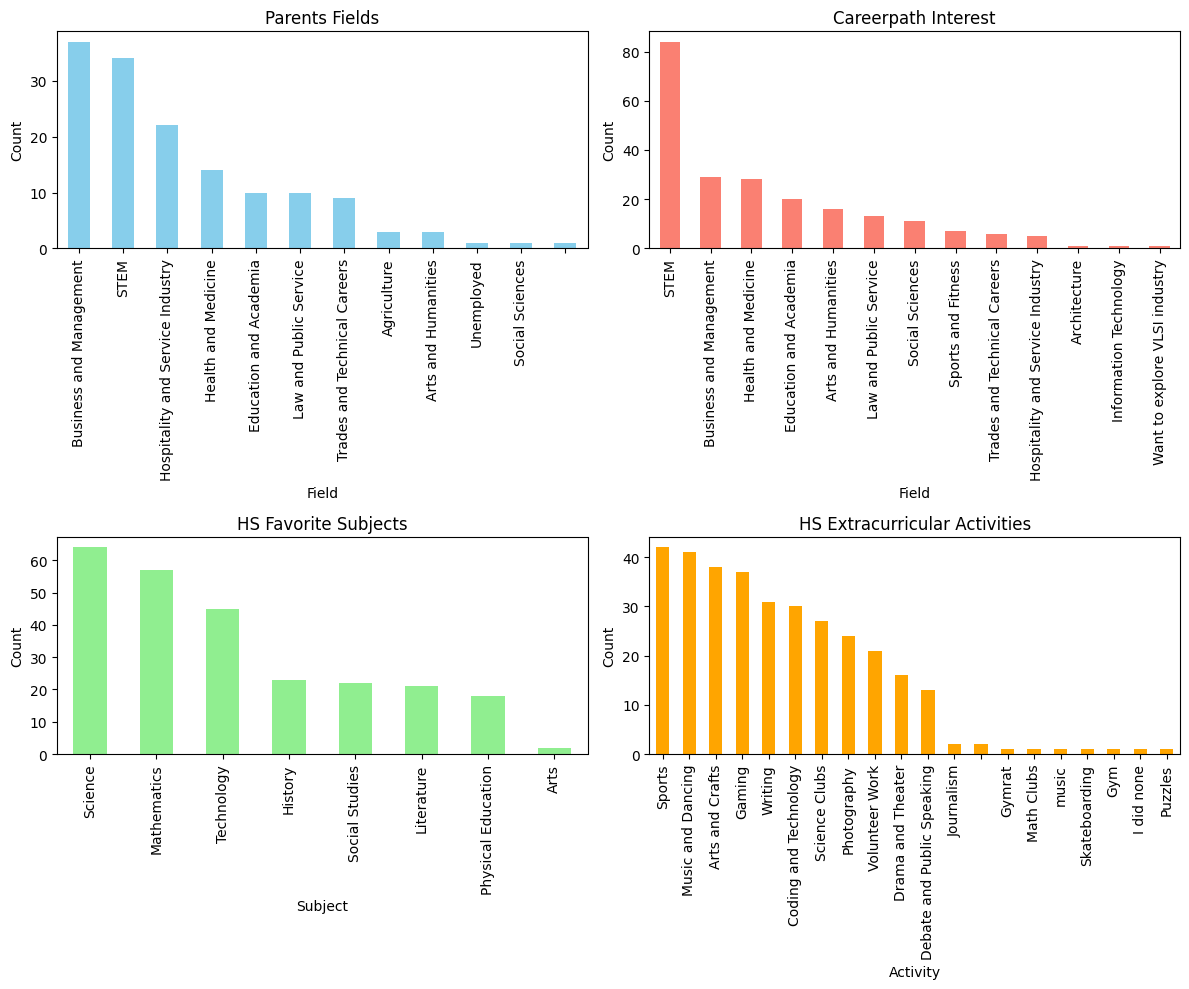

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example columns for categories (replace these with actual column names from your dataset)
parents_fields = df['parents_fields'].dropna()
careerpath_interest = df['careerpath_interest'].dropna()
hs_favesub = df['hs_favesub'].dropna()
hs_extracurr = df['hs_extracurr'].dropna()

# Function to split multiple answers and return a Counter object of answers
def get_answer_counts(column):
    answers = column.str.split(',').explode().str.strip().value_counts()
    return answers

# Get counts for each category
parents_fields_counts = get_answer_counts(parents_fields)
careerpath_interest_counts = get_answer_counts(careerpath_interest)
hs_favesub_counts = get_answer_counts(hs_favesub)
hs_extracurr_counts = get_answer_counts(hs_extracurr)

# Create subplots for each category
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each category's counts
parents_fields_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Parents Fields')
axes[0, 0].set_xlabel('Field')
axes[0, 0].set_ylabel('Count')

careerpath_interest_counts.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Careerpath Interest')
axes[0, 1].set_xlabel('Field')
axes[0, 1].set_ylabel('Count')

hs_favesub_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('HS Favorite Subjects')
axes[1, 0].set_xlabel('Subject')
axes[1, 0].set_ylabel('Count')

hs_extracurr_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('HS Extracurricular Activities')
axes[1, 1].set_xlabel('Activity')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### **Cleaning column formats**

In [ ]:
#cleaning the current_programs column
unique_programs = df['current_program'].unique().tolist()
unique_programs

['BS Applied Mathematics - Data Science Track',
 'BS Nutrition and Dietetics',
 'BS Chemical Engineering',
 'BS Nursing',
 'BS Computer Engineering',
 'BS Architecture',
 'BS Applied Mathematics Data Science',
 'BS Mechanical Engineering',
 'BS Psychology ',
 'BS Medical Laboratory Sciences',
 'Computer Engineering Tech',
 'Bs Applied Mathematics ',
 'BS Internal Auditing',
 'BS MATHEMATICS ',
 'BS Psychology',
 'Bs Computer Engineering ',
 'BSEMC Game Development',
 'BTech AIDS ',
 'AB Behavioral Science',
 'BSBA Marketing Management',
 'BS Applied Mathematics',
 'BS Computer Science',
 'BS Pharmacy',
 'BS Accountancy',
 'BS Civil Engineering',
 'BS Information Technology ',
 'Associate in Aircraft Mechanic',
 'BS Applied Math Data Science',
 'BS Electronics Communication Engineering ',
 'BSED major in Values Education',
 'Bachelor of Library and Information Science',
 'BS Computer Engineering ',
 'BS Hospitality Management ',
 'Library and Information Science',
 'Bachelor in Library 

In [ ]:
#Removing the prefixes and cleaning the current_program column
df['current_program'] = df['current_program'].str.lower() \
                                           .str.replace('^bsed', 'secondary education', regex = True) \
                                           .str.replace('^bsba', 'business administration', regex = True) \
                                           .str.replace('bachelor in ', '', regex = True) \
                                           .str.replace('bachelor of', '', regex = True ) \
                                            .str.replace('bachelor in ', '', regex = True) \
                                           .str.replace('bachelor of', '', regex = True ) \
                                           .str.replace('btech aids', 'artifical intelligence and data science', regex = True) \
                                           .str.replace('^bsemc', ' entertainment and multimedia computing - ', regex = True) \
                                           .str.replace('^bs', '', regex=True) \
                                           .str.replace('^ba', '', regex=True) \
                                           .str.replace('^ab', '', regex = True)



df['current_program'].str.strip()
unique_programs = df['current_program'].unique().tolist()
unique_programs.sort()
unique_programs

[' accountancy',
 ' agriculture ',
 ' applied math data science',
 ' applied math; data science track',
 ' applied mathematic in data sciece',
 ' applied mathematics',
 ' applied mathematics ',
 ' applied mathematics - data science track',
 ' applied mathematics data science',
 ' applied mathematics data science track',
 ' architecture',
 ' astrophysics',
 ' behavioral science',
 ' biology',
 ' chemical engineering',
 ' civil engineering',
 ' communication and media arts',
 ' computer engineering',
 ' computer engineering ',
 ' computer science',
 ' data science ',
 ' electrical engineering ',
 ' electronics and communication',
 ' electronics communication engineering ',
 ' electronics enggineering',
 ' electronics engineering',
 ' entertainment and multimedia computing -  game development',
 ' hospitality management ',
 ' in agriculture ',
 ' information systems',
 ' information technology',
 ' information technology ',
 ' internal auditing',
 ' library and information science',
 ' ma

In [ ]:
# Further cleaning the 'current_program' column

df['current_program'] = (
    df['current_program']
    .str.strip()  # Remove leading and trailing spaces
    .str.replace('math data science$', 'mathematics - data science', regex=True)
    .str.replace('applied mathematic in data sciece', 'applied mathematics - data science', regex=True)
    .str.replace('applied math; data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics - data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics data science', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics - data science track', 'applied mathematics - data science', regex = True)



    .str.replace('electronics engineering', 'electrical engineering', regex = True)
    .str.replace('electronics and communication', 'electronics communication engineering', regex = True)
    .str.replace('electronics enggineering', 'electrical engineering', regex=True)
    .str.replace('eletronics communication engineering', 'electronics communication engineering', regex=True)

    .str.replace('computer engineering tech', 'computer engineering', regex = True)

    .str.replace('^medical laboratory sciences', 'medical laboratory science', regex = True)
    .str.replace('in agriculture', 'agriculture', regex = True)

    .str.replace('secondary education mathematics', 'secondary education major in mathematics', regex=True)
    .str.replace('library and information science ', 'library and information science', regex=True)
    .str.replace('artifical', 'artificial', regex=True)
    .str.lower()
)

unique_cleaned_programs = df['current_program'].unique().tolist()
unique_cleaned_programs.sort()
unique_cleaned_programs

['accountancy',
 'aeronautical engineering',
 'agriculture',
 'applied mathematics',
 'applied mathematics - data science',
 'architecture',
 'artificial intelligence and data science',
 'associate in aircraft mechanic',
 'astrophysics',
 'behavioral science',
 'biology',
 'business administration marketing management',
 'chemical engineering',
 'civil engineering',
 'communication and media arts',
 'computer engineering',
 'computer science',
 'data science',
 'electrical engineering',
 'electronics communication engineering',
 'entertainment and multimedia computing -  game development',
 'hospitality management',
 'information systems',
 'information technology',
 'internal auditing',
 'library and information science',
 'mathematics',
 'mechanical engineering',
 'medical laboratory science',
 'nursing',
 'nutrition and dietetics',
 'pharmacy',
 'psychology',
 'radiologic technology',
 'secondary education major in mathematics',
 'secondary education major in values education',
 'te

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

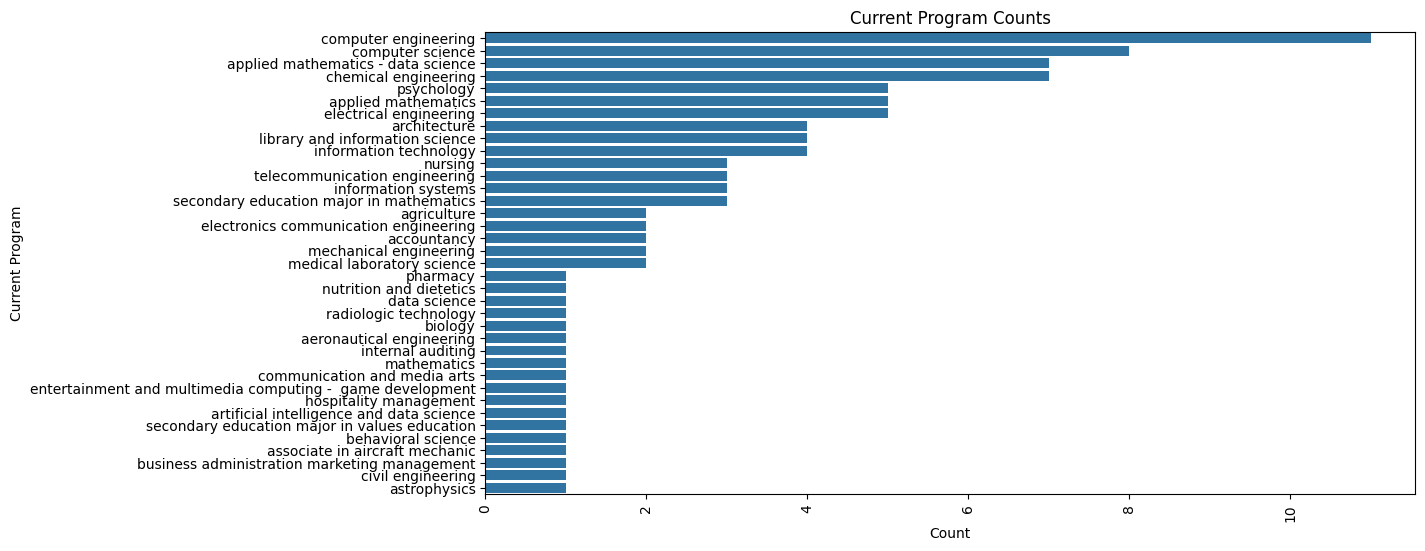

In [ ]:
program_counts = df['current_program'].value_counts()
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=program_counts.values, y=program_counts.index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Current Program Counts')
plt.xlabel('Count')
plt.ylabel('Current Program')
plt

In [ ]:
#cleaning the yr_level column
df['yr_level'] = df['yr_level'].str.replace(r'(st|nd|rd|th)\s*year', '', regex=True, case=False).str.strip().astype(int)
df

,gender,yr_level,current_program,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,ave_household_income,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
0,Female,4,applied mathematics - data science,Private,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,150000.0,...,3.0,5,5,5,2,2,5,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,"Sports, Music and Dancing, Arts and Crafts, Dr..."
1,Male,4,applied mathematics - data science,Science High School,High School Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,12,Parents,50000.0,...,4.0,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4,nutrition and dietetics,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,75000.0,...,0.5,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism
3,Male,4,chemical engineering,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,40000.0,...,2.5,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports
4,Male,4,chemical engineering,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,100000.0,...,1.5,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,2,telecommunication engineering,Public,High School Graduate,Hospitality and Service Industry,Yes,10,Parents,35000.0,...,2.0,3,4,1,5,1,4,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology, Physical Edu...","Sports, Music and Dancing, Science Clubs, Phot..."
96,Female,4,computer engineering,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,35000.0,...,3.0,1,2,1,3,3,2,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,Debate and Public Speaking
97,Male,1,computer science,Public,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,40000.0,...,2.0,4,5,4,5,4,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
98,Female,1,electrical engineering,Public,No formal education,Hospitality and Service Industry,No,50,Parents,17600.0,...,7.5,2,3,1,4,5,3,"STEM (Science, Technology, Engineering, Mathem...","History, Social Studies, Technology","Writing, Debate and Public Speaking"


In [ ]:
#exporting to csv

df.to_csv('cleaned_data.csv', index=False)
